In [1]:
import torch
from torch import nn
from aeon.datasets import load_classification
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.nn.deformable_conv import PackedDeformableConvolution1d

In [2]:
X_train, y_train = load_classification('ECG200', split='TRAIN')

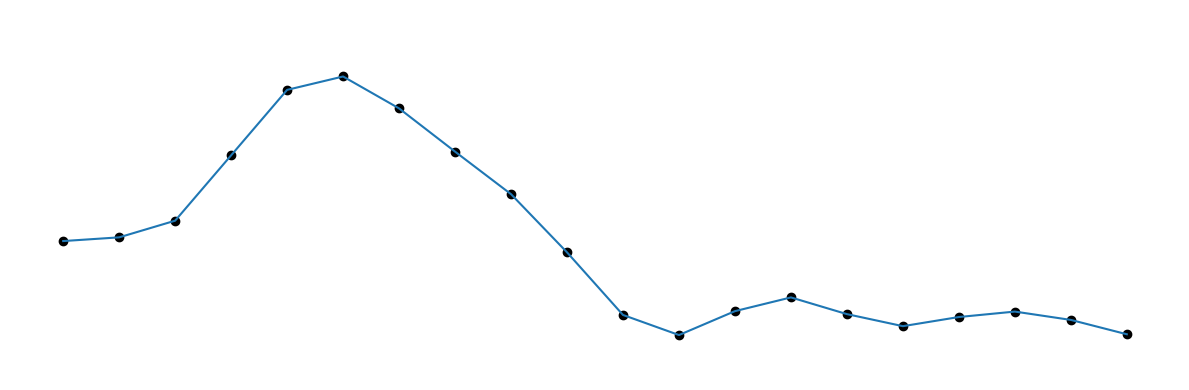

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(X_train[0][0][:20])
plt.scatter(list(range(20)), X_train[0][0][:20], color='black')
plt.ylim((-1, 3))
plt.axis('off')
plt.tight_layout()

In [4]:
conv = PackedDeformableConvolution1d(in_channels=1, out_channels=1, padding='same', kernel_size=5, bias=False)
conv.weight

Parameter containing:
tensor([[[ 0.2714,  0.3409,  0.3612, -0.1430,  0.1719]]], requires_grad=True)

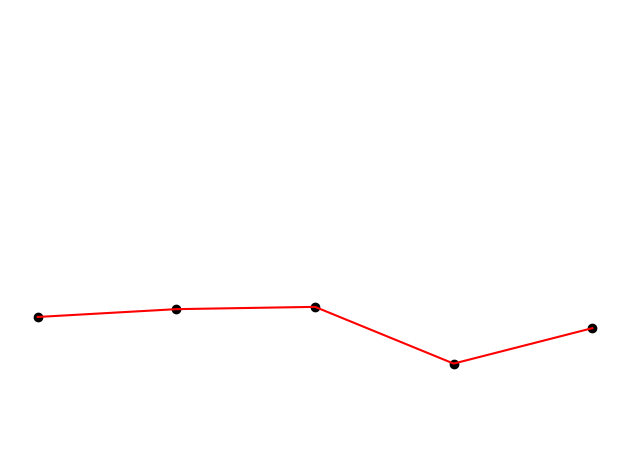

In [5]:
# plt.figure(figsize=(12, 4))
plt.plot(conv.weight.detach().numpy()[0, 0, :], color='red')
plt.scatter(list(range(5)), conv.weight.detach().numpy()[0, 0, :], color='black')
plt.ylim((-1, 3))
# plt.xlim((0, 100))
plt.axis('off')

plt.tight_layout()

In [6]:
sample = torch.from_numpy(X_train[:1, :, :20]).float()
sample = conv(sample)
sample

/home/gbarbosa/anaconda3/envs/defconv/lib/python3.9/site-packages/torch/nn/modules/module.py:1359: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


tensor([[[0.1353, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000]]], grad_fn=<ConvolutionBackward0>)

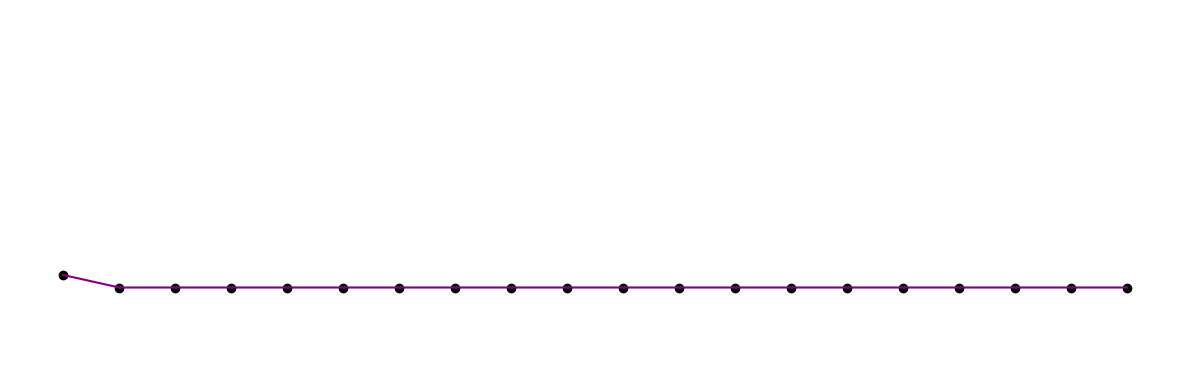

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(sample.detach().numpy()[0, 0, :], color='purple')
plt.scatter(list(range(20)), sample.detach().numpy()[0, 0, :], color='black')
plt.ylim((-1, 3))
plt.axis('off')
plt.tight_layout()

In [ ]:
from aeon.datasets import load_from_tsfile